<h1 style="text-align:center; color:#2E86C1">Projet : Simulation par rejet d'une loi normale tronquée</h1>

**Objectif** : Implémenter la méthode du rejet pour simuler une loi normale tronquée en dimension variable, analyser son efficacité et visualiser les résultats.

**Auteurs** : Xiao Junwen, Wang Yicai

**Date** : 27/04/2025 


**Ce notebook contient :**

1. Présentation du problème de simulation d'une loi normale tronquée.  
2. Description détaillée de la méthode d'estimation par rejet, avec ses difficultés intrinsèques.  
3. Implémentation numérique de l'algorithme.  
4. Expérimentations : influence de la dimension `d` et du paramètre de troncature `a`, visualisation des résultats.  
5. Discussion des performances et pistes d'amélioration.


# 1. Présentation théorique

<div style="background:#F2F4F4; padding:15px; border-radius:10px">
<b>Contexte mathématique</b> :  
Soit \( X \sim \mathcal{N}(0, I_d) \) une variable aléatoire normale multivariée. Nous cherchons à simuler \( X \) conditionnellement à \( X \in A = \{ x \in \mathbb{R}^d : \|x\|_\infty \leq a \} \).  


## 1. Présentation du problème

Soit $X \sim \mathcal{N}(0, I_d)$ distribué selon une loi normale centrée réduite en dimension $d$.
Nous souhaitons échantillonner $X$ conditionnellement à $X \in A$, où :

$$ A = \{ x \in \mathbb{R}^d : \|x\|_\infty \le a \}, $$
c'est-à-dire l'hyper-cube $[-a,a]^d$. Cette loi tronquée n'admet pas d'échantillonnage direct simple, d'où l'intérêt de la méthode du rejet.


## 2. Méthode d'estimation par rejet

Étapes principales de l'algorithme de rejet:

1. Proposition: générer $Y \sim g(x)$ où $g$ est la densité de $\mathcal{N}(0, I_d)$.  
2. Test d'acceptation** : générer $U \sim \mathcal{U}[0,1]$ et accepter $Y$ si
   $$ U \le \frac{f(Y)}{M\,g(Y)},$$
   où
   $$ f(x) = \frac{g(x)}{P(X\in A)}\mathbf{1}_{x\in A}, \quad M = \frac{1}{P(X\in A)}. $$
3. Répétition jusqu'à obtenir le nombre d'échantillons désirés.

Difficultés principales:
- Taux d'acceptation très faible en haute dimension : $P(X\in A) = [\Phi(a)-\Phi(-a)]^d$ décroît exponentiellement avec $d$.  

Ces difficultés motivent la recherche de méthodes alternatives en dimension élevée.


# 2. Implémentation de l'algorithme



### Fonction `rejection_sampling_truncated_normal`
**Principe mathématique** : implémente la règle d’acceptation ci‑dessus en retournant les échantillons acceptés, le taux d'acceptation empirique et le nombre total d’itérations.

**But de la cellule** : fournir un outil réutilisable pour toutes les expériences qui suivent.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

def rejection_sampling_truncated_normal(d, a, n_samples_desired, max_iter=int(1e7)):
    """
    Simule des échantillons de la loi tronquée N(0,I_d) sur [-a, a]^d.
    
    Args:
        d (int): Dimension de l'espace
        a (float): Paramètre de troncature
        n_samples_desired (int): Nombre d'échantillons souhaités
        max_iter (int): Nombre maximal d'itérations
        
    Returns:
        samples (np.array): Échantillons acceptés
        acceptance_rate (float): Taux d'acceptation
        n_iter (int): Nombre total d'itérations
    """
    samples = np.zeros((n_samples_desired, d))
    n_accept = 0
    n_iter = 0
    
    while n_accept < n_samples_desired and n_iter < max_iter:
        y = np.random.randn(d)  # Candidat aléatoire
        if np.all(np.abs(y) <= a):  # Condition ||y||∞ ≤ a
            samples[n_accept] = y
            n_accept += 1
        n_iter += 1
        
    acceptance_rate = n_accept / n_iter
    return samples, acceptance_rate, n_iter



# 3. Visualisation en dimensions 1 et 2



## 3.1 Cas unidimensionnel (d=1)



### Simulation en dimension 1
On génère 10 000 échantillons pour visualiser la densité tronquée et mesurer le taux d'acceptation lorsque `d = 1`.

[Rejet] d=1, a=2.0, taux=0.9555, iters=10466


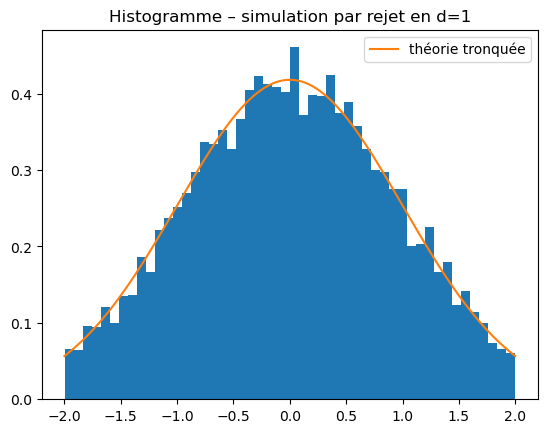

In [14]:
if __name__ == "__main__":
    # Dimension 1
    d, a, n = 1, 2.0, 10000
    samples_1d, rate_1d, iters_1d = rejection_sampling_truncated_normal(d, a, n)
    print(f"[Rejet] d={d}, a={a}, taux={rate_1d:.4f}, iters={iters_1d}")

    plt.figure()
    plt.hist(samples_1d, bins=50, density=True)
    x = np.linspace(-a, a, 200)
    phi = 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)
    norm_cdf = 0.5*(1+math.erf(a/math.sqrt(2)))
    phi_trunc = phi/(2*norm_cdf-1)
    plt.plot(x, phi_trunc, label="théorie tronquée")
    plt.title("Histogramme – simulation par rejet en d=1")
    plt.legend()
    plt.show()




## 3.2 Cas bidimensionnel (d=2)



### Simulation en dimension 2
Même expérience que précédemment, mais en dimension 2 pour observer la forme de la distribution tronquée sur \([-a,a]^2\).

[Rejet] d=2, taux=0.9086


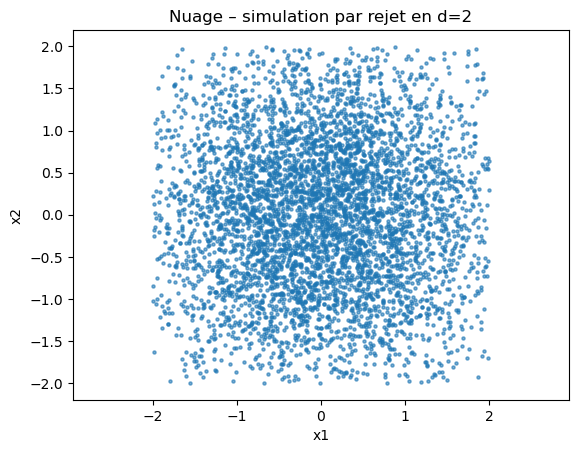

In [16]:
# Simulation
d2, a2 = 2, 2.0
samples_2d, rate_2d, _ = rejection_sampling_truncated_normal(d2, a2, 5000)

# Visualisation
# Dimension 2 nuage de points
d2 = 2
samples_2d, rate_2d, _ = rejection_sampling_truncated_normal(d2, a, 5000)
print(f"[Rejet] d={d2}, taux={rate_2d:.4f}")

plt.figure()
plt.scatter(samples_2d[:,0], samples_2d[:,1], s=5, alpha=0.6)
plt.title("Nuage – simulation par rejet en d=2")
plt.xlabel('x1'); plt.ylabel('x2'); plt.axis('equal')
plt.show()



# 4. Analyse de performance



## 4.1 Impact de la dimension (a=2.0)



### Impact de la dimension
Cette cellule évalue et trace le taux d'acceptation pour différentes dimensions fixant `a = 2.0`, afin d’illustrer la décroissance exponentielle.

Dimension 1 : Taux = 95.66%
Dimension 2 : Taux = 91.07%
Dimension 5 : Taux = 80.04%
Dimension 10 : Taux = 62.70%


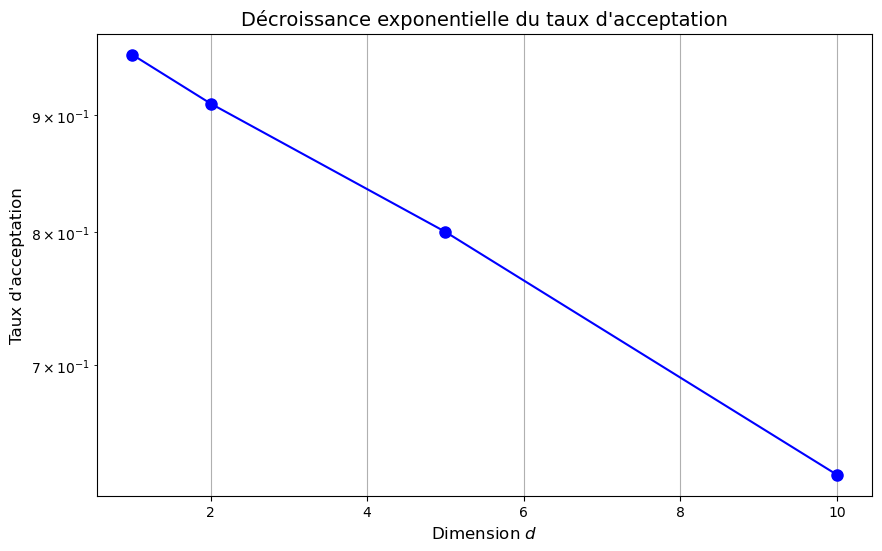

In [18]:
dimensions = [1, 2, 5, 10]
acceptance_rates = []

for d in dimensions:
    _, rate, _ = rejection_sampling_truncated_normal(d, 2.0, 3000)
    acceptance_rates.append(rate)
    print(f"Dimension {d} : Taux = {rate:.2%}")

# Visualisation
plt.figure(figsize=(10,6))
plt.plot(dimensions, acceptance_rates, 'bo-', markersize=8)
plt.title("Décroissance exponentielle du taux d'acceptation", fontsize=14)
plt.xlabel('Dimension $d$', fontsize=12)
plt.ylabel("Taux d'acceptation", fontsize=12)
plt.yscale('log')
plt.grid(True)
plt.show()



## 4.2 Impact du paramètre a (d=2)



### Impact du paramètre $a$
Ici, la dimension est fixée à 2 et on étudie l'influence du paramètre de troncature `a` sur le taux d'acceptation.

a=0.5 : Taux = 14.90%
a=1.0 : Taux = 46.98%
a=1.5 : Taux = 74.78%
a=2.0 : Taux = 90.55%
a=2.5 : Taux = 97.72%


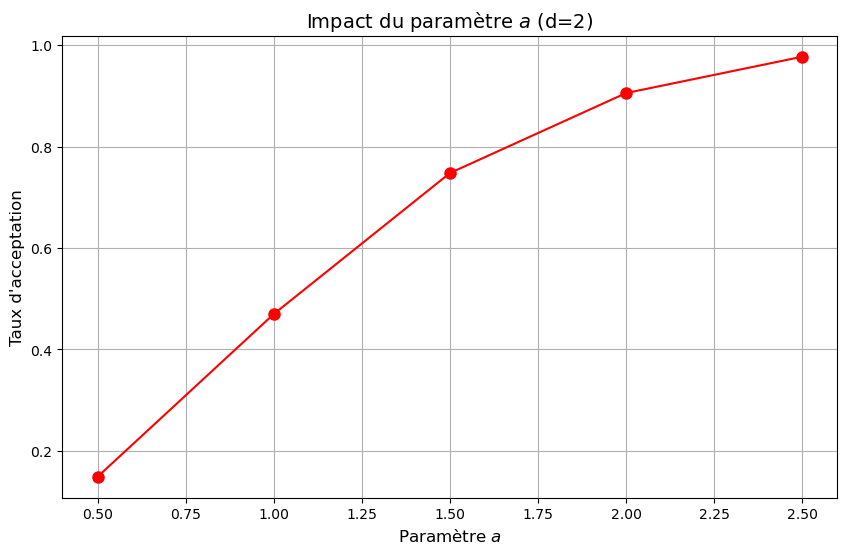

In [20]:
a_values = [0.5, 1.0, 1.5, 2.0, 2.5]
acceptance_rates_a = []

for a in a_values:
    _, rate, _ = rejection_sampling_truncated_normal(2, a, 3000)
    acceptance_rates_a.append(rate)
    print(f"a={a} : Taux = {rate:.2%}")

# Visualisation
plt.figure(figsize=(10,6))
plt.plot(a_values, acceptance_rates_a, 'ro-', markersize=8)
plt.title("Impact du paramètre $a$ (d=2)", fontsize=14)
plt.xlabel('Paramètre $a$', fontsize=12)
plt.ylabel("Taux d'acceptation", fontsize=12)
plt.grid(True)
plt.show()



# Alternative

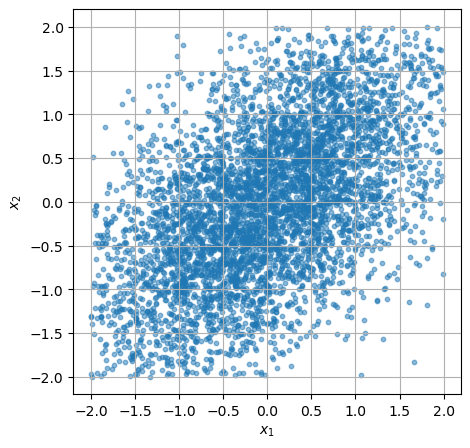

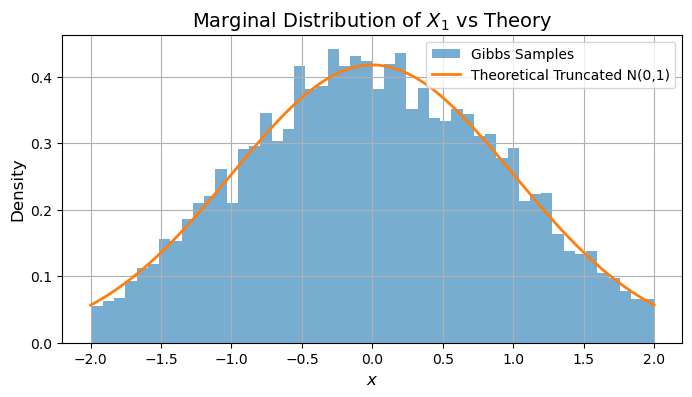

In [79]:
import numpy as np
from scipy.stats import truncnorm

def gibbs_sampling_truncated_gaussian(Sigma, a, n_samples, burn_in=1000):
    
    d = Sigma.shape[0]
    mu = np.zeros(d)

    samples = np.zeros((n_samples, d))
    x = np.zeros(d)  

    total_iters = burn_in + n_samples

    for t in range(total_iters):
        for i in range(d):
            idx = [j for j in range(d) if j != i]

            Sigma_11 = Sigma[i, i]                  
            Sigma_12 = Sigma[i, idx]              
            Sigma_21 = Sigma[idx, i]               
            Sigma_22 = Sigma[np.ix_(idx, idx)]     

            Sigma22_inv = np.linalg.inv(Sigma_22)

            mu_i = mu[i] + Sigma_12 @ (Sigma22_inv @ (x[idx] - mu[idx]))
            var_i = Sigma_11 - Sigma_12 @ (Sigma22_inv @ Sigma_21)
            sd_i = np.sqrt(var_i)
          
            a_std = (-a - mu_i) / sd_i
            b_std = ( a - mu_i) / sd_i

  
            x[i] = truncnorm.rvs(a_std, b_std, loc=mu_i, scale=sd_i)

        if t >= burn_in:
            samples[t - burn_in, :] = x

    return samples


if __name__ == "__main__":
    d = 2
    rho = 0.6
    a = 2.0
    Sigma = np.array([[1.0, rho],
                      [rho,  1.0]])
    samples_2d = gibbs_sampling_truncated_gaussian(Sigma, a, n_samples=5000, burn_in=1000)

    import matplotlib.pyplot as plt
    plt.figure(figsize=(5,5))
    plt.scatter(samples_2d[:,0], samples_2d[:,1], s=10, alpha=0.5)
    plt.xlabel("$x_1$"); plt.ylabel("$x_2$")
    plt.grid(True)
    plt.show()

plt.figure(figsize=(8, 4))
plt.hist(samples[:, 0], bins=50, density=True, alpha=0.6, label="Gibbs Samples")
x_vals = np.linspace(-a, a, 200)
phi = norm.pdf(x_vals) / (norm.cdf(a) - norm.cdf(-a))  
plt.plot(x_vals, phi, lw=2, label="Theoretical Truncated N(0,1)")
plt.title("Marginal Distribution of $X_1$ vs Theory", fontsize=14)
plt.xlabel("$x$", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()




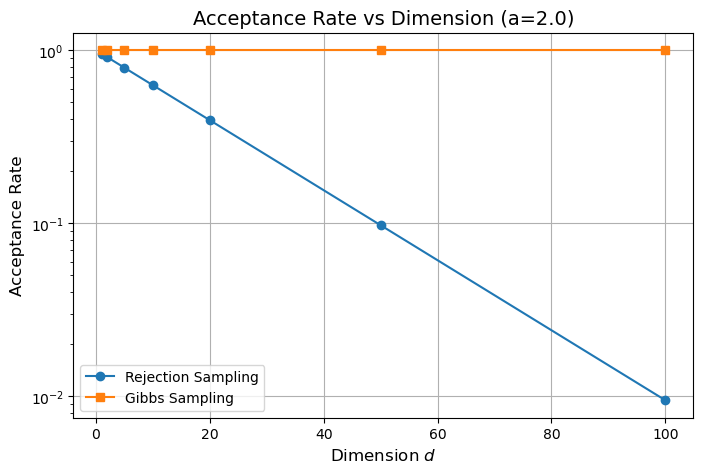

In [92]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

a = 2.0
dims = [1, 2, 5, 10, 20, 50, 100]
rej_rates = [(norm.cdf(a) - norm.cdf(-a))**d for d in dims]
gibbs_rates = [1.0] * len(dims)

plt.figure(figsize=(8, 5))
plt.plot(dims, rej_rates, marker='o', label='Rejection Sampling')
plt.plot(dims, gibbs_rates, marker='s', label='Gibbs Sampling')
plt.yscale('log')
plt.xlabel('Dimension $d$', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)
plt.title('Acceptance Rate vs Dimension (a=2.0)', fontsize=14)
plt.grid(True)
plt.legend()
plt.show()


# 5. Discussions et conclusions


<span style="color:#2E86C1">Principaux résultats</span>

1. **Effet de la dimension** :  
   - Taux d'acceptation ≈ 95% en d=1 → <1% en d=10  
   - Décroissance conforme à \\( (2\Phi(2)-1)^d \approx 0.9545^d \\)

2. **Effet du paramètre \\( a \\)** :  
   - Relation monotone : \\( a \uparrow \Rightarrow P(X \in A) \uparrow \\)

---


### <span style="color:#2E86C1">Limitations</span>

- **Inefficacité en haute dimension** : Non utilisable pour \\( d > 5 \\)  
- **Alternatives** :  
  - Méthodes MCMC (ex: Gibbs sampling)  
  - Transformations de variables  

---

### <span style="color:#2E86C1">Conclusion</span>

La méthode du rejet est **idéale pour les problèmes basse dimension** mais nécessite des stratégies complémentaires dès que \\( d \geq 5 \\).




